<h1 style="text-align: center;" markdown="1">Norwegian red Cattle</h1>
<h3 style="text-align: center;" markdown="1">Cattle genome assembly project</h3>

-----

In [1]:
import seaborn as sns
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_filter1d
import plotly.graph_objs as go
import pytablewriter

from pycoQC.pycoQC import pycoQC
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode (connected=False)

#%load_ext rpy2.ipython

def reads_1D_data (df, field_name="num_bases", xscale="linear", nbins=200, smooth_sigma=2, sample=1000000):
        """Private function preparing data for reads_len_1D and reads_qual_1D"""
        # Downsample if needed
        if sample and len(df)>sample:
            df = df.sample(sample)

            
       
        #Extract data field from df
        data = df[field_name].values

        # Count each categories in log or linear space
        min = np.nanmin(data)
        max = np.nanmax(data)
        if xscale == "log":
            count_y, bins = np.histogram (a=data, bins=np.logspace (np.log10(min), np.log10(max)+0.1, nbins))
        elif xscale == "linear":
            count_y, bins = np.histogram (a=data, bins= np.linspace (min, max, nbins))

        # Remove last bin from labels
        count_x = bins[1:]

        # Smooth results with a savgol filter
        if smooth_sigma:
            count_y = gaussian_filter1d (count_y, sigma=smooth_sigma)

        # Get percentiles percentiles
        stat = np.percentile (data, [10,25,50,75,90])
        y_max = count_y.max()

        data_dict = dict (
            x = [count_x, [stat[0],stat[0]], [stat[1],stat[1]], [stat[2],stat[2]], [stat[3],stat[3]], [stat[4],stat[4]]],
            y = [count_y, [0,y_max], [0,y_max], [0,y_max], [0,y_max], [0,y_max]],
            name = ["Density", "10%", "25%", "Median", "75%", "90%"],
            text = ["",
                ["", "10%<br>{:,.2f}".format(stat[0])],
                ["", "25%<br>{:,.2f}".format(stat[1])],
                ["", "Median<br>{:,.2f}".format(stat[2])],
                ["", "75%<br>{:,.2f}".format(stat[3])],
                ["", "90%<br>{:,.2f}".format(stat[4])]],
        )

        # Make layout dict = Off set for labels on top
        layout_dict = {"yaxis.range": [0, y_max+y_max/6]}

        return data_dict, layout_dict

# <center>General Info</center>

<h3 style="text-align: center;" markdown="1">n = 29  + X and Y   <br>
Estimated genome size = 3000 Mbases
<br><br>

|  id | value  |
|---|---|
|Sequenced fish id   | ?  |
| Sample freezer coordinates  | ?  |
| Sequencing center  |  CIGENE |
| Machine |  PromethION |
|   Flowcell type | FLO-PRO002 |   |
| Lib prep | SQK-LSK109  |   |
|Sequencing runs |              2 |
   
   
Raw data: `\$(find /mnt/smb/labfile/Backup/PromethION/basecalled/*Lump* -name \*fastq.gz |grep -v chopped)`   <br>
Porechopped data: `\$(find /mnt/smb/labfile/Backup/PromethION/basecalled/*Lump* -name \*chopped.fastq.gz)`   <br>
Quality filtered data: `/net/fs-1/projects01/TRANSPOSE/Rawdata/PromethION/prom-lumpy-20190115.min4k.q7.h50.fastq.gz` 

<br>
<br>
<br>
<br>
<br>
<br>

# <center>1. Sequencing and raw data overiew</center>

/mnt/users/michelmo/.local/lib/python3.6/site-packages/pycoQC/pycoQC.py:166: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/mnt/users/michelmo/.local/lib/python3.6/site-packages/pycoQC/pycoQC.py:211: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/mnt/users/michelmo/.local/lib/python3.6/site-packages/pycoQC/pycoQC.py:290: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



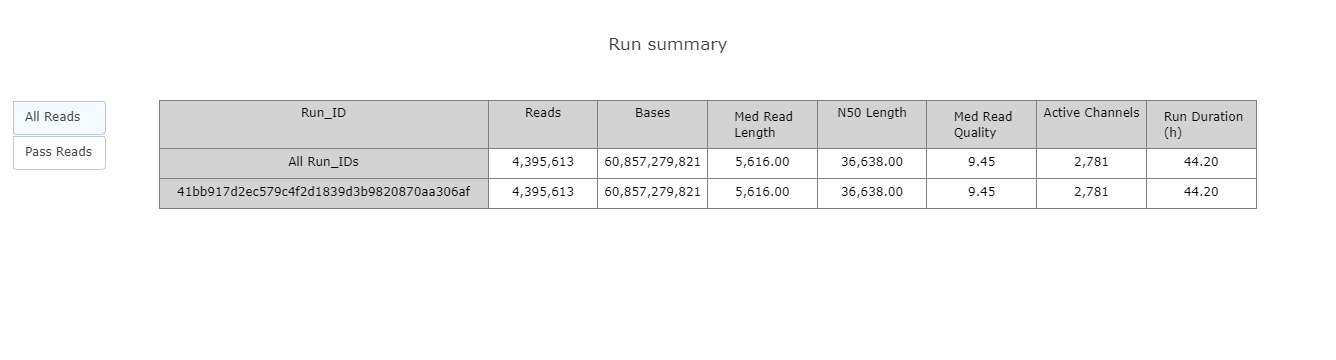

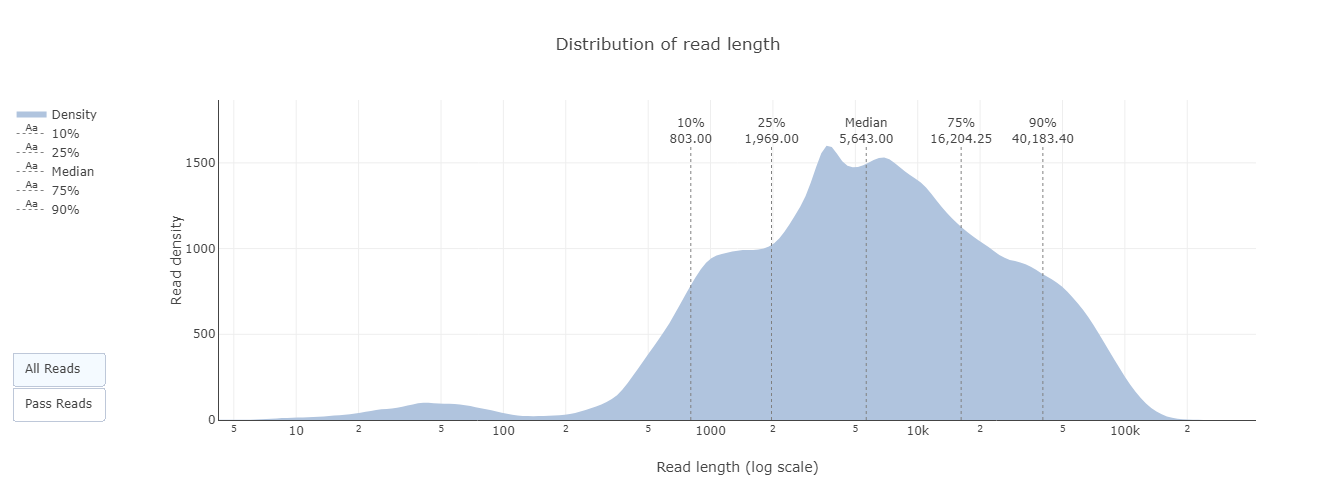

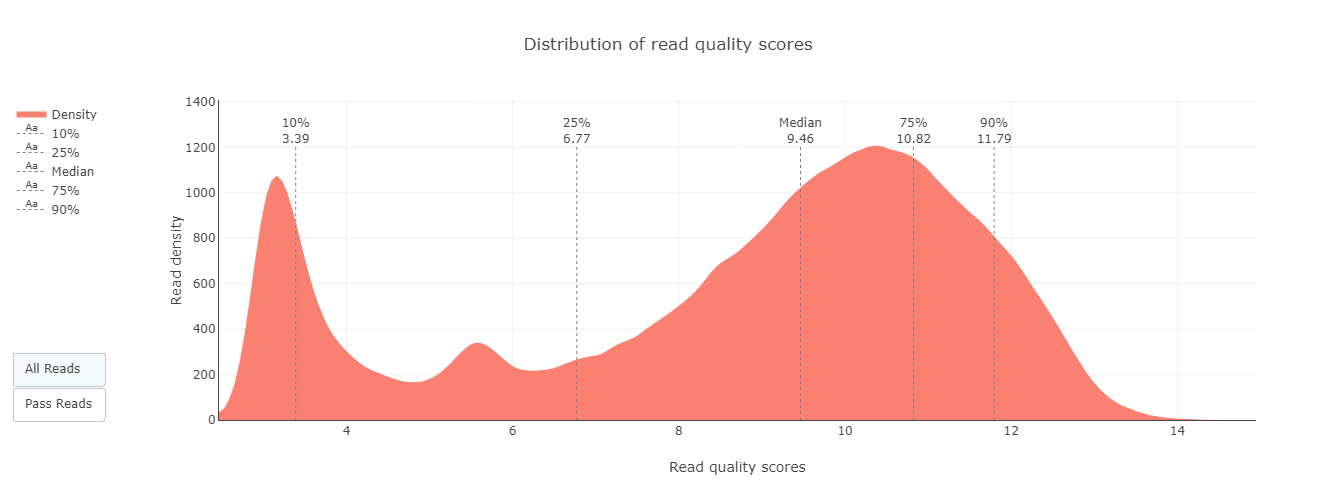

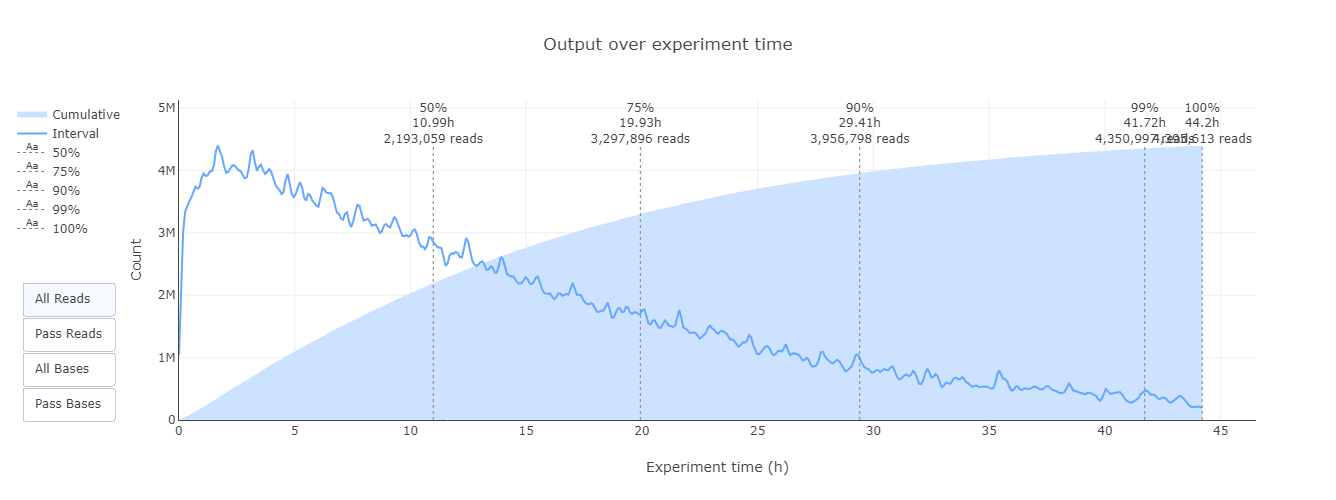

In [2]:

#qtest = pycoQC("/net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/data/Lumpfish.recalled.sequencing_summary.txt", verbose_level=0)
qtest = pycoQC("/mnt/SCRATCH/michelmo/Projects/Bos/sequencing_summary/*sequencing_summary.txt", verbose_level=0)


fig1 = qtest.summary()
iplot (fig1, show_link=False)

fig2 = qtest.reads_len_1D()
iplot (fig2, show_link=False)

fig3 = qtest.reads_qual_1D()
iplot(fig3, show_link=False)

fig4 = qtest.output_over_time()
iplot(fig4, show_link=False)


<br>
<br>
<br>
<br>

# <center> 2. Raw read processing 

## porechopped and fastp processed

### porechop command

`docker run -i --volume /data:/data hadrieng/porechop porechop --threads $CPUS -i $FASTQ -o $OUTPUT > ${OUTPUT}.txt`

### fastp command

#### Filter for L > 4000 bp and Q > 7 phred-score
    
`
zcat $(find /mnt/smb/labfile/Backup/PromethION/basecalled/*Bos* -name \*chopped.fastq.gz ) | $BINDIR/fastp -w 16 --stdin -z 4 -o ${OUTFILE} -V  --disable_trim_poly_g --disable_adapter_trimming -q 7 -l 4000 -f 50
`

## After L trimming and Q filtering



In [8]:
dfL = pd.read_csv("/net/cn-1/mnt/SCRATCH/michelmo/Projects/Bos/Cattle.20190227.4kb.q7.50h.rec.fastq.LQ.txt",  delimiter="\t", header=None)


In [11]:
#display(dfL.head())
print("total yield: " + str(dfL[0].sum()))

print("total yield: " + str(dfL[0].sum()))
print("total reads: " + str(len(dfL.index)) )
print("mean read length: " + str(dfL[1].sum()/ len(dfL.index)) + "\n")

print("coverage for 3000 Mb genome: ", dfL[0].sum() / 3000000000)

total yield: 51691314621
total yield: 51691314621
total reads: 2233254
mean read length: 10.190846621118782

coverage for 3000 Mb genome:  17.230438207


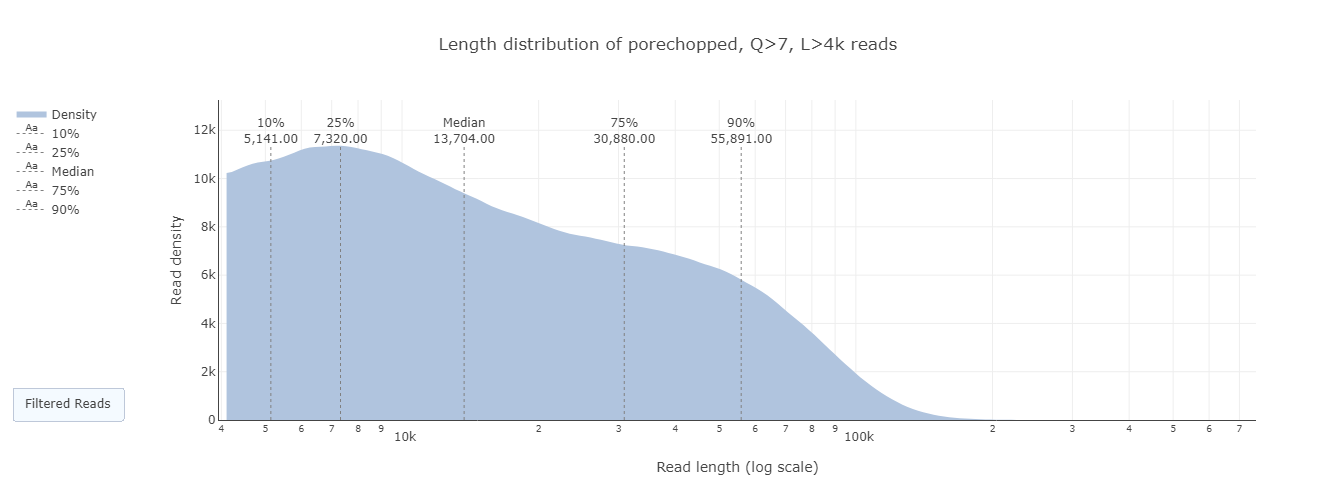

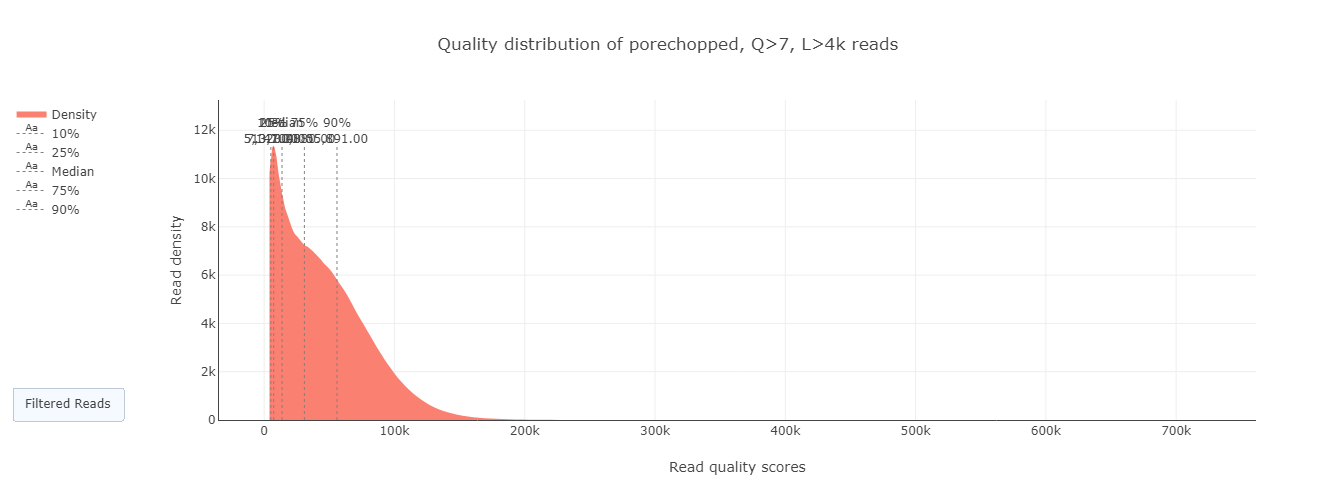

In [22]:
min_pass_qual = 7
df = dfL.rename(columns={0: 'num_bases', 1 : 'mean_qscore'})

#display(df.head())
#display(df.shape)
#display(dfL.shape)

    
color="lightsteelblue"
width=None
height=500
nbins=200
smooth_sigma=2
sample=1000000
plot_title="Length distribution of porechopped, Q>7, L>4k reads"   
xscale = "log"
    
    
pass_df = df[df["mean_qscore"]>=min_pass_qual]
        
dd1, ld1 = reads_1D_data(df, field_name="num_bases", xscale="log", nbins=nbins, smooth_sigma=smooth_sigma, sample=sample)
dd2, ld2 = reads_1D_data (pass_df, field_name="num_bases", xscale="log", nbins=nbins, smooth_sigma=smooth_sigma, sample=sample)

line_style = {'color':'gray','width':1,'dash': 'dot'}
data = [
            go.Scatter (x=dd1["x"][0], y=dd1["y"][0], name=dd1["name"][0], fill='tozeroy', fillcolor=color, mode='none', showlegend=True),
            go.Scatter (x=dd1["x"][1], y=dd1["y"][1], name=dd1["name"][1], text=dd1["text"][1], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][2], y=dd1["y"][2], name=dd1["name"][2], text=dd1["text"][2], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][3], y=dd1["y"][3], name=dd1["name"][3], text=dd1["text"][3], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][4], y=dd1["y"][4], name=dd1["name"][4], text=dd1["text"][4], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][5], y=dd1["y"][5], name=dd1["name"][5], text=dd1["text"][5], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style)]

updatemenus = [
            dict (type="buttons", active=0, x=-0.2, y=0, xanchor='left', yanchor='bottom', buttons = [
                dict (label='Filtered Reads', method='update', args=[dd1, ld1])])]
                  
# tweak plot layout
layout = go.Layout (
            hovermode="closest",
            legend={"x":-0.2, "y":1,"xanchor":'left',"yanchor":'top'},
            updatemenus=updatemenus,
            width=width,
            height=height,
            title = plot_title,
            xaxis = {"title":"Read length (log scale)", "type":"log", "zeroline":False, "showline":True},
            yaxis = {"title":"Read density", "zeroline":False, "showline":True, "fixedrange":True, "range":ld1["yaxis.range"]})

figure = go.Figure (data=data, layout=layout)
iplot(figure)






#quality plot 

color="salmon"
width=None
height=500
nbins=200
smooth_sigma=2
sample=100000,
plot_title1="Quality distribution of porechopped, Q>7, L>4k reads"   

        # Plot initial data
line_style = {'color':'gray','width':1,'dash': 'dot'}
data1 = [
            go.Scatter (x=dd1["x"][0], y=dd1["y"][0], name=dd1["name"][0], fill='tozeroy', fillcolor=color, mode='none', showlegend=True),
            go.Scatter (x=dd1["x"][1], y=dd1["y"][1], name=dd1["name"][1], text=dd1["text"][1], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][2], y=dd1["y"][2], name=dd1["name"][2], text=dd1["text"][2], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][3], y=dd1["y"][3], name=dd1["name"][3], text=dd1["text"][3], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][4], y=dd1["y"][4], name=dd1["name"][4], text=dd1["text"][4], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
            go.Scatter (x=dd1["x"][5], y=dd1["y"][5], name=dd1["name"][5], text=dd1["text"][5], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style)]

        # Create update buttons
updatemenus1 = [
            dict (type="buttons", active=0, x=-0.2, y=0, xanchor='left', yanchor='bottom', buttons = [
                dict (label='Filtered Reads', method='update', args=[dd1, ld1])])]

        # tweak plot layout
layout1 = go.Layout (
            hovermode = "closest",
            legend = {"x":-0.2, "y":1,"xanchor":'left',"yanchor":'top'},
            updatemenus = updatemenus1,
            width = width,
            height = height,
            title = plot_title1,
            xaxis = {"title":"Read quality scores", "zeroline":False, "showline":True},
            yaxis = {"title":"Read density", "zeroline":False, "showline":True, "fixedrange":True, "range":ld1["yaxis.range"]})

figure1 = go.Figure (data=data1, layout=layout1)
iplot(figure1)








In [ ]:
#2D plot of length and quality 

#create dataset: 


def reads_2D_data (df, len_nbins, qual_nbins, smooth_sigma=1.5, sample=100000):
        """ Private function preparing data for reads_len_qual_2D """
        # Downsample if needed
        
        len_data = df["num_bases"]
        qual_data = df["mean_qscore"]

        len_min, len_med, len_max = np.percentile (len_data, (0, 50, 100))
        qual_min, qual_med, qual_max = np.percentile (qual_data, (0, 50, 100))

        len_bins = np.logspace (start=np.log10((len_min)), stop=np.log10(len_max)+0.1, num=len_nbins, base=10)
        qual_bins = np.linspace (start=qual_min, stop=qual_max, num=qual_nbins)
        z, y, x = np.histogram2d (x=qual_data, y=len_data, bins=[qual_bins, len_bins])

        if smooth_sigma:
            z = gaussian_filter(z, sigma=smooth_sigma)

        z_min, z_max = np.percentile (z, (0, 100))

        # Extract label and values
        data_dict = dict (
            x = [x, [len_med]],
            y = [y, [qual_med]],
            z = [z, None],
            contours = [dict(start=z_min, end=z_max, size=(z_max-z_min)/15),None])
        return data_dict


colorscale = [[0.0,'rgba(255,255,255,0)'], [0.1,'rgba(255,150,0,0)'], [0.25,'rgb(255,100,0)'], [0.5,'rgb(200,0,0)'], [0.75,'rgb(120,0,0)'], [1.0,'rgb(70,0,0)']],
width = None,
height = 600,
len_nbins = 200,
qual_nbins = 75,
smooth_sigma = 2,
sample = 100000,

display(df.head())
dd1 = reads_2D_data (df, len_nbins=len_nbins, qual_nbins=qual_nbins, smooth_sigma=smooth_sigma, sample=sample)
display(dd1.head())

        # Plot initial data
data = [
            go.Contour (x=dd1["x"][0], y=dd1["y"][0], z=dd1["z"][0], contours=dd1["contours"][0],
                name="Density", hoverinfo="name+x+y", colorscale=colorscale, showlegend=True, connectgaps=True, line={"width":0}),
            go.Scatter (x=dd1["x"][1], y=dd1["y"][1],
                mode='markers', name='Median', hoverinfo="name+x+y", marker={"size":12,"color":'black', "symbol":"x"})]

        # Create update buttons
updatemenus = [
            dict (type="buttons", active=0, x=-0.2, y=0, xanchor='left', yanchor='bottom', buttons = [
                dict (label='All Reads', method='restyle', args=[dd1]),
                dict (label='Pass Reads', method='restyle', args=[dd2])])]

        # tweak plot layout
layout = go.Layout (
            hovermode = "closest",
            legend = {"x":-0.2, "y":1,"xanchor":'left',"yanchor":'top'},
            updatemenus = updatemenus,
            width = width,
            height = height,
            title = plot_title,
            xaxis = {"title":"Estimated read length", "showgrid":True, "zeroline":False, "showline":True, "type":"log"},
            yaxis = {"title":"Read quality scores", "showgrid":True, "zeroline":False, "showline":True,})

figure2 = go.Figure (data=data, layout=layout)
iplot(figure1)



<br>
<br>
<br>

# <center> 3. Genome assembly  
----
###  wtdbg2

`$APPDIR/wtdbg2 -t $CPUS -p 20 -AS 2 -s 0.05 -L 10000 -K 800 -g 0.7g -fo $PREFIX $OUTFILE`   
`zcat ${PREFIX}.ctg.lay.gz | $APPDIR/wtpoa-cns -t $CPUS -fo ${PREFIX}.ctg.lay.fa`

####  output assembly fasta: 

`/net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/data/Leo_the_Lumpfish.L10K.q7.h50.p20.ctg.lay.fa`

 
<br>
<br>
<br>   
    
###  assembly stats: 

In [23]:
def compute_Ns(df):
        field_name = "num_bases"
        N_l = []
        gsize = df['num_bases'].sum()
        df.sort_values(by=['num_bases'])
        df["cumsum"] = df['num_bases'].cumsum() 

        N25 = df[df["cumsum"] >= gsize*0.25][field_name].max()
        C25 = df.loc[df["cumsum"] >= gsize*0.25].index.min() + 1
        CS25 = gsize*0.25
        
        N50 = df[df["cumsum"] >= gsize*0.5][field_name].max()
        C50 = df.loc[df["cumsum"] >= gsize*0.5].index.min() + 1
        CS50 = gsize*0.5
        
        N90 = df[df["cumsum"] >= gsize*0.9][field_name].max()
        C90 = df.loc[df["cumsum"] >= gsize*0.9].index.min() + 1
        CS90 = gsize*0.9
        
        N_l.append ("{:,}".format(N25))
        N_l.append ("{:,}".format(C25))
        N_l.append ("{:,}".format(N50))
        N_l.append ("{:,}".format(C50))
        N_l.append ("{:,}".format(N90))
        N_l.append ("{:,}".format(C90))
        return N_l
        
        
            
def df_to_cell (name, df, gc):
        """Extract information from sub-dataframes and return a list of values"""
        l = []
        l.append (name)
        l.append ("{:,}".format(len(df)))
        l.append ("{:,}".format(df["num_bases"].sum()))
        l.append ("{:,.2f}".format(df["num_bases"].mean()))
        l.append ("{:,}".format(df["num_bases"].max()))
        l.append ("{:,}".format(df["num_bases"].min()))
        
        for e in compute_Ns(df): 
                    l.append (e)
        l.append ("{:,.2f}".format(gc))

        return l

def summary_data (df, gc, asm_file):
        """
        Private function preparing data for summary
        """
        asm_name = asm_file
        header = ["assembly summary", "contigs", "total Bases", "mean Length","max Contig Length" , "min Contig Length","N25 Length", "N25 contigs", "N50 Length" ,"N50 contigs" ,"N90 Length" ,"N90 contigs", "GC%" ]
        cells = df_to_cell(asm_name, df, gc)
        #print(cells)

        
        data_dict = dict (
            header = [{"values":header, "fill":{"color":"lightgrey"}, "align":"center", "font":{"color":'black', "size":12}, "height":40}],
            cells  = [{"values":cells, "fill":{"color":["lightgrey", "white"]}, "align":"center", "font":{"color":'black', "size":12}, "height":30}])

        return data_dict

    
def plot_table (df, gc, asm_file):
    
        dd1 = summary_data (df, gc, asm_file)
        data = [go.Table(header = dd1["header"][0], cells = dd1["cells"][0], columnwidth = [60, 20])]
        layout = go.Layout (width=width, height=height, title=None)

        return go.Figure (data=data, layout=layout)

def assembly_data (df, field_name="num_bases", xscale="linear"):
        """Private function preparing data for assembly_plot"""
        df["cumsum"] = df[field_name].cumsum() 
        #Extract data field from df
        data = df[field_name].values
        
        gsize = df[field_name].sum()
        # Count each categories in log or linear space
        min = np.nanmin(data)
        max = np.nanmax(data)
        
        count_x = np.cumsum (data)
        count_y = data 
        
        # Get percentiles percentiles
        stat = np.percentile (data, [10,25,50,75,90])
        y_max = max
        #print(y_max)
        x_max = count_x.max()
        
        
        #index
        df['col'] = df.index.values + 1
        df['col'] = 'contig: ' + df['col'].astype(str)        
        ctext = df['col'].values
        #add N50, N25, N70... stats
        
        N25 = df[df["cumsum"] >= gsize*0.25][field_name].max()
        C25 = df.loc[df["cumsum"] >= gsize*0.25].index.min() + 1
        CS25 = gsize*0.25
        
        N50 = df[df["cumsum"] >= gsize*0.5][field_name].max()
        C50 = df.loc[df["cumsum"] >= gsize*0.5].index.min() + 1
        CS50 = gsize*0.5
        
        N90 = df[df["cumsum"] >= gsize*0.9][field_name].max()
        C90 = df.loc[df["cumsum"] >= gsize*0.9].index.min() + 1
        CS90 = gsize*0.9
        
        Mean = df[field_name].mean()
        CMean = df[df["num_bases"] > df["num_bases"].mean()]["cumsum"].max()
        
        data_dict = dict (
            x = [count_x, [0, CS50], [0, CS90], [0, CS25], [0, CMean], [stat[4],stat[4]]],
            y = [count_y, [N50,N50], [N90,N90], [N25, N25], [Mean, Mean], [0,y_max]],
            name = ["Cumulative Sum", "N50", "N90", "N25", "75%", "90%"],
            text = [ctext,
                ["", "N50<br>{:,.2f}".format(N50)],
                ["", "N90<br>{:,.2f}".format(N90)],
                ["", "N25<br>{:,.2f}".format(N25)],
                ["", "Mean<br>{:,.2f}".format(Mean)],
                ["", "90%<br>{:,.2f}".format(stat[4])]],
        )

        # Make layout dict = Off set for labels on top
        layout_dict = {"yaxis.range": [0, y_max+y_max/10], 
                      "xaxis.range" : [0, x_max+x_max/10]
                      }

        return data_dict, layout_dict
    
def create_data(assembly): 
    dfScf = pd.read_csv(assembly,  delimiter="\t", header=None)
    display(dfScf.head())
    gsize = dfScf[0].sum()
    maxL = dfScf[0].max()
    gc = dfScf[1].mean()
    
    df = dfScf.rename(columns={0: 'num_bases'})
    d1, l1 = assembly_data(df, field_name="num_bases", xscale="linear")
    
    return d1, l1, df, gc


In [60]:
file = "/net/cn-1/mnt/SCRATCH/michelmo/Projects/Bos/Cattle.p19_L4000_K1000_s0.05_AS2_e3.ctg.lay.RaconRun2.fa"
!ls -hs {file}


2.5G /net/cn-1/mnt/SCRATCH/michelmo/Projects/Bos/Cattle.p19_L4000_K1000_s0.05_AS2_e3.ctg.lay.RaconRun2.fa


In [55]:
%%bash
cat {file} | seqkit fx2tab -n -l -g - | sed 's/ \+/\t/g' | sed 's/\t\+/\t/g' |awk '{print $(NF-1),"\t",$NF}' |sort -n -r > tmp.ctg.lenGC

cat: {file}: No such file or directory


0      1
0  70467976  42.33
1  60615987  41.58
2  59082687  39.42
3  56425880  43.27
4  55270840  40.19

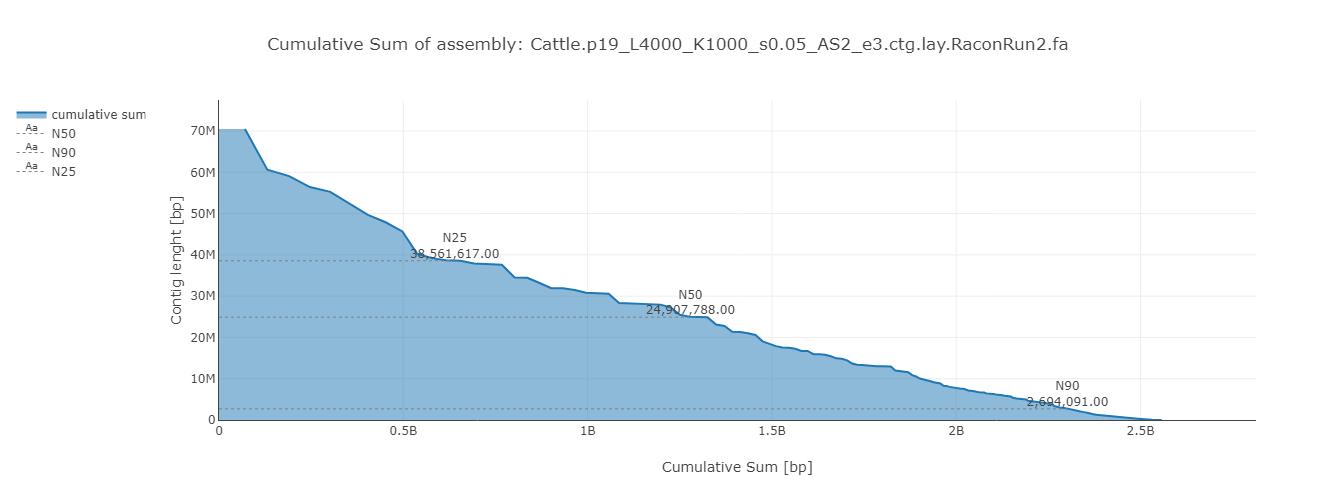

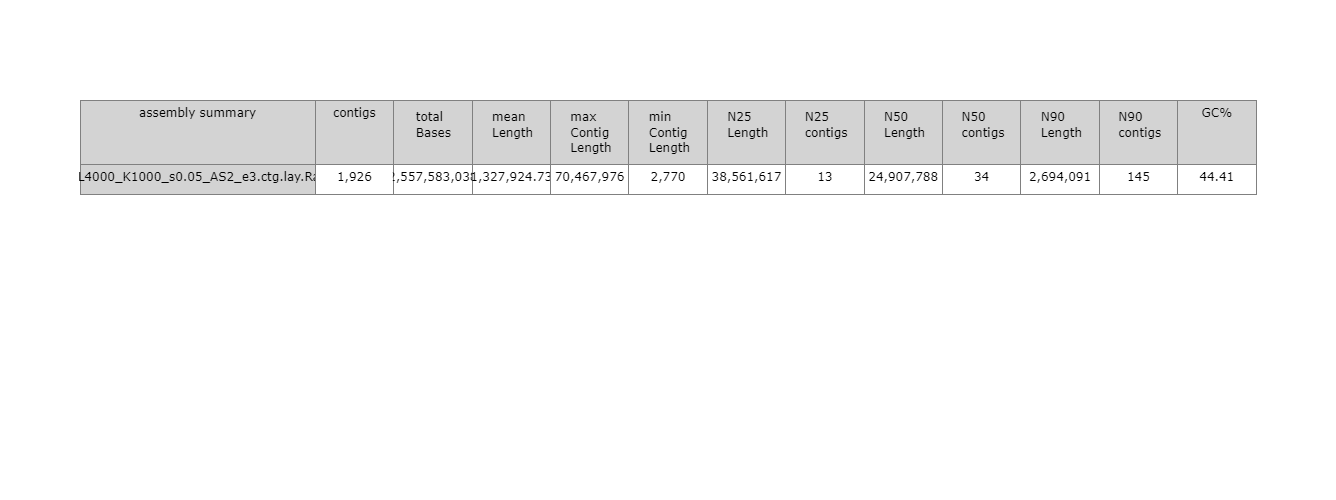

<Figure size 1120x800 with 0 Axes>

In [62]:
asm_file = "Cattle.p19_L4000_K1000_s0.05_AS2_e3.ctg.lay.RaconRun2.fa"
asm_path="/net/cn-1/mnt/SCRATCH/michelmo/Projects/Bos"

file = "/net/cn-1/mnt/SCRATCH/michelmo/Projects/Bos/RR1.lenGC"
file = "/net/cn-1/mnt/SCRATCH/michelmo/Projects/Bos/RR2.lenGC"
file = "/net/cn-1/mnt/SCRATCH/michelmo/Projects/Bos/raw.lenGC"

color="lightsteelblue"
width=None
height=500
nbins=200


#!seqkit fx2tab -n -l -g "{file}" | sed 's/ \+/\t/g' | sed 's/\t\+/\t/g' |awk '{print $(NF-1),"\t",$NF}' |sort -n -r > tmp.ctg.lenGC

d1, l1, df, gc= create_data(file)



plt.figure(figsize = (14,10), dpi = 80,facecolor='w', edgecolor='k' )
plt.tight_layout()

line_style = {'color':'gray','width':1,'dash': 'dot'}

trace = [ go.Scatter (x=d1["x"][0], y=d1["y"][0], mode = 'lines', name='cumulative sum',  text = d1["text"][0], fill='tozerox'), 
          go.Scatter (x=d1["x"][1], y=d1["y"][1], name=d1["name"][1], text=d1["text"][1], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
          go.Scatter (x=d1["x"][2], y=d1["y"][2], name=d1["name"][2], text=d1["text"][2], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),
          go.Scatter (x=d1["x"][3], y=d1["y"][3], name=d1["name"][3], text=d1["text"][3], mode="lines+text", hoverinfo="skip", textposition='top center', line= line_style),

            ]

layout = go.Layout (
            hovermode="closest",
            legend={"x":-0.2, "y":1,"xanchor":'left',"yanchor":'top'},
            width=width,
            height=height,
            title ="Cumulative Sum of assembly: {}".format(asm_file)   
,
            xaxis = {"title":"Cumulative Sum [bp]", "type":"linear", "zeroline":False, "showline":True, "range": l1["xaxis.range"]},
            yaxis = {"title": "Contig lenght [bp]", "zeroline":False, "showline":True, "fixedrange":True, "range":l1["yaxis.range"]})

data = trace
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
iplot(fig, filename='basic-scatter', image_height= 40, image_width=30)
table = plot_table(df, gc, asm_file)
iplot(table, filename='basic-scatter', image_height= 40, image_width=30)

<br>
<br>
<br>

## <center> 3.1 assembly polishing

    
### Overview: 
    
#### Polishing pipeline: 

wtdbg2 output -> Racon R1 -> Racon R2 -> Medaka R1 -> Medaka R2  -> Pilon 

`TODO: add flowchart`

### Racon

run racon
```md
#data
ASSEMBLY=/net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/data/Leo_the_Lumpfish.L10K.q7.h50.p20.ctg.lay.fa
FASTQ=/net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/data/Clum.Leo.20190115.4kb.q7.50h.fastq.gz
PAF=LL.1.p20.ONT20190115.paf

$MINIMAPDIR/minimap2 -x ava-ont -t ${CPUS} $ASSEMBLY $FASTQ > $PAF

$RACON/racon -u -t $CPUS $FASTQ $PAF $ASSEMBLY
```

### Evaluation of gene-space with BUSCO
    

run BUSCO
```
 python /mnt/users/michelmo/tools/busco/scripts/run_BUSCO.py -i $ASSEMBLY -o ${ASSEMBLY}_busco -l /net/fs-1/home01/michelmo/tools/busco/datasets/actinopterygii_odb9/ -m genome -c 16 -sp zebrafish
```

    
    
#### Racon round 0 (no polishing)

`
BUSCO score:        C:22.4%[S:22.2%,D:0.2%],F:7.7%,M:69.9%,n:4584
`

#### Racon round 1
`
BUSCO score:        C:56.4%[S:55.7%,D:0.7%],F:10.3%,M:33.3%,n:4584
`


#### Racon round 2

`
BUSCO score:        C:57.1%[S:56.0%,D:1.1%],F:11.1%,M:31.8%,n:4584
`


### Medaka

run medaka
```
#data
DRAFT=/net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/data/Leo_the_Lumpfish.L10K.q7.h50.p20.ctg.lay.fa
BASECALLS=/net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/data/Clum.Leo.20190115.4kb.q7.50h.fastq.gz

OUTDIR=medaka_consensus

medaka_consensus -i ${BASECALLS} -d ${DRAFT} -o ${OUTDIR} -t ${NPROC} -m r94
```





    
    
   
    
    
    
    
    
    
    
    
    
    
#### Racon round 0, Medaka round 1 (raw output from wtdbg2-cns)

`
BUSCO score:        C:71.9%[S:70.5%,D:1.4%],F:9.6%,M:18.5%,n:4584
`

#### Racon round 0, Medaka round 2 (raw output from wtdbg2-cns)
this would be a shortcut, saving time as Racon is stalling on bigger files
    
`
BUSCO score:        C:76.5%[S:74.9%,D:1.6%],F:8.6%,M:14.9%,n:4584

`
    
    
    
    
#### Racon round 2, Medaka round 1

`
BUSCO score:         C:74.6%[S:73.2%,D:1.4%],F:9.0%,M:16.4%,n:4584
`
#### Racon round 2, Medaka round 2

`
BUSCO score:       C:80.7%[S:79.1%,D:1.6%],F:7.4%,M:11.9%,n:4584`
    
    
### Pilon
### using bbnorm Illumina data for polishment 
    
````bash
 bowtie2 -x /net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/asm/medaka_consensusLL1rr2m2/consensus.fastaB  -p 1  --no-unal -1 /net/cn-1/mnt/SCRATCH/tinagr/lumpfish/Analysis/bbnorm/Lumphy_L001-L002_R1_001-norm.fastq.gz -2 /net/cn-1/mnt/SCRATCH/tinagr/lumpfish/Analysis/bbnorm/Lumphy_L001-L002_R2_001-norm.fastq.gz | samtools view -bS -  > Lump.Illumina.bam

    
samtools sort -@ $CPU -o Lump.Illumina.s.bam Lump.Illumina.bam

samtools index Lump.Illumina.s.bam

java -jar /net/fs-1/home01/michelmo/tools/pilon-1.23.jar --frags Lump.Illumina.s.bam --genome $ASSEMBLY

```
    
#### LL1rr2m2pilon

`    
BUSCO score:         C:96.0%[S:93.8%,D:2.2%],F:1.3%,M:2.7%,n:4584 
`
    
    
    
    
    


<br>
<br>
<br>
<br>
<br>
<br>


In [ ]:
## cumulative sequence plots for assemblies



In [85]:
%%bash
#create data 
asm="/net/cn-1/mnt/SCRATCH/michelmo/Projects/Lumpfish/asm/medaka_consensusLL1rr2m2/consensus.fasta"
echo -e 'seq\tlength\tgc' >tmp.txt
/mnt/users/michelmo/tools/seqkit/seqkit fx2tab -n -l -g $asm |sed 's/\t\+/\t/' |sort -k2,2 -n -r >> tmp.txt

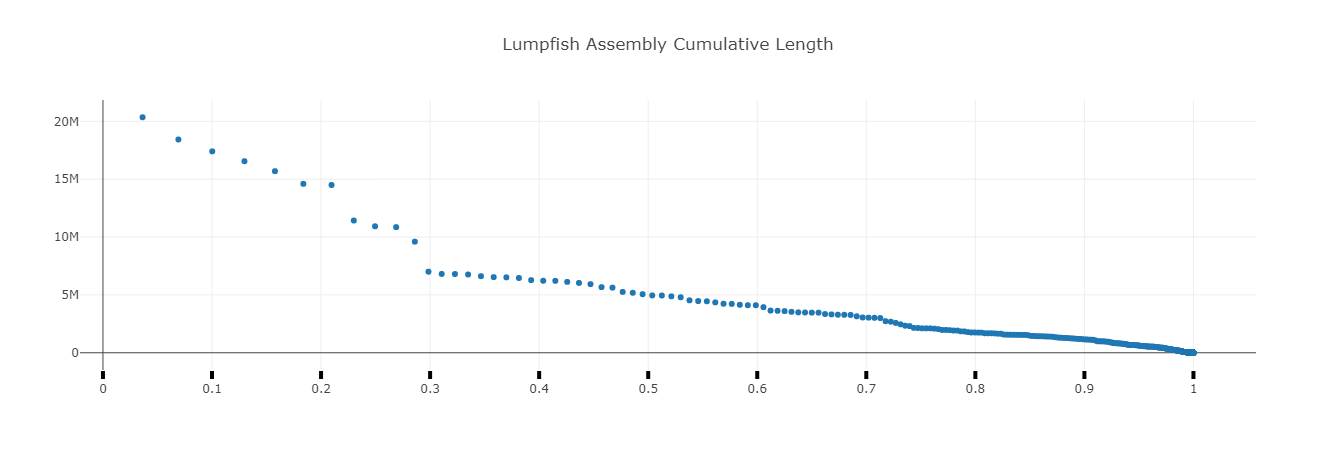

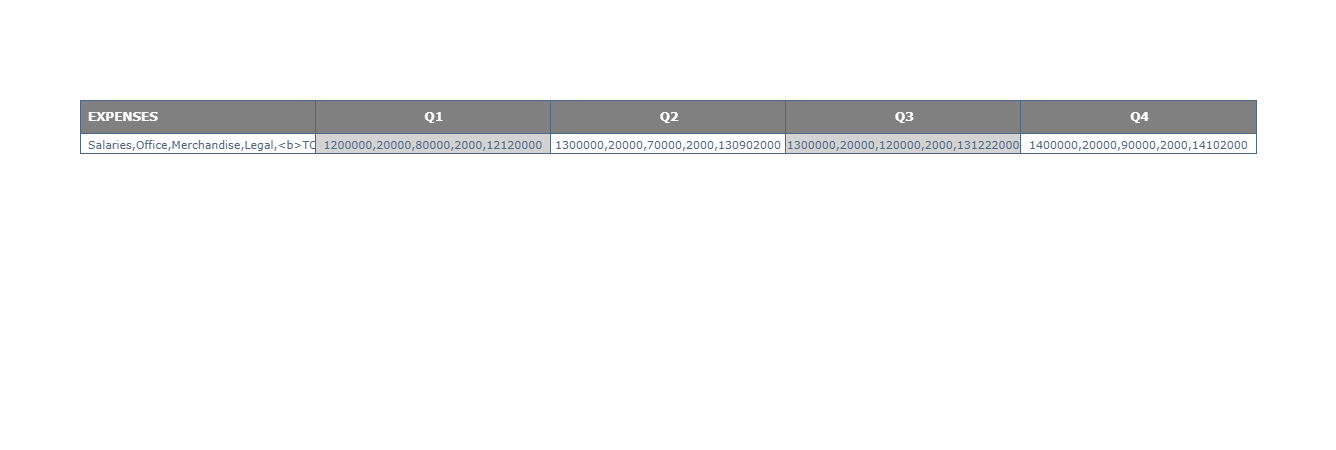

<Figure size 1120x800 with 0 Axes>

In [89]:
plt.figure(figsize = (14,10), dpi = 80,facecolor='w', edgecolor='k' )
plt.tight_layout()

dfd = pd.read_csv("tmp.txt", sep= "\t")
#display(dfd.head)

gsize = dfd["length"].sum()
#print(gsize)

#display(dfd["length"].cumsum() / gsize)

#sns.set_style("darkgrid")


#ax = sns.scatterplot(dfd["length"].cumsum() / gsize, dfd["length"])
#ax.set(ylabel='contig size [Mb]', xlabel='Percentage of assembly covered by contigs >= [Y]' ) #,yscale="log")
#ax.set_title('Cumulative contig distribution')
#plt.yticks(ax.get_yticks(), ax.get_yticks()/ 1000000)
#plt.xticks([0.1, .5, 0.8, 0.9])
#plt.ylim(-1000000, max(dfd["length"])+1000000)


trace = go.Scatter(
    x = dfd["length"].cumsum() / gsize,
    y = dfd["length"],
    mode = 'markers'
)


layout = go.Layout(title='Lumpfish Assembly Cumulative Length',
    xaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ) ) #, yaxis=dict(
        #type='log',
        #autorange=True))

data = [trace]
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
iplot(fig, filename='basic-scatter', image_height= 40, image_width=30)




headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

trace0 = go.Table(
  header = dict(
    values = [['<b>EXPENSES</b>'],
                  ['<b>Q1</b>'],
                  ['<b>Q2</b>'],
                  ['<b>Q3</b>'],
                  ['<b>Q4</b>']],
    line = dict(color = '#506784'),
    fill = dict(color = headerColor),
    align = ['left','center'],
    font = dict(color = 'white', size = 12)
  ),
  cells = dict(
    values = [
      [['Salaries', 'Office', 'Merchandise', 'Legal', '<b>TOTAL</b>']],
      [[1200000, 20000, 80000, 2000, 12120000]],
      [[1300000, 20000, 70000, 2000, 130902000]],
      [[1300000, 20000, 120000, 2000, 131222000]],
      [[1400000, 20000, 90000, 2000, 14102000]]],
    line = dict(color = '#506784'),
    fill = dict(color = [rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 11)
    ))

data = [trace0]

iplot(data, filename = "alternating row colors")


In [ ]:
%%bash 
rm tmp.txt